## Quick Start with CLIPU²Net
This is a notebook that quickly shows how to run CLIPU²Net model for referring image segmentation.

### Preparations
First install the requirements for `CLIPU²Net` in your environment, following the [installation instructions](https://github.com/cjiang2/CLIPU2Net#installation) in the repo. 

In [1]:
from typing import List
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
from torchvision.transforms import Compose, ToTensor, Normalize, Resize, InterpolationMode
from PIL import Image

from clipu2net.models import CLIPU2Net

%matplotlib inline

### Inference
CLIPU²Net segments region given a referring expression. We load the model, then take a few example images for inference. 

In [2]:
input_resolution = 336      # Default resolution, can be modified
threshold = 0.5
device = "cuda" if torch.cuda.is_available() else "cpu"
enable_amp = True if torch.cuda.is_available() else False

# Load the model
model = CLIPU2Net(
    input_resolution=input_resolution,
    device=device,
)
if torch.cuda.is_available():
    model = model.cuda()
model.load_state_dict(torch.load("checkpoints/clipu2net-rd64-fine-ViT-B-16.pt", map_location=device), strict=False)
model.eval()

# Default torchvision.transforms
preprocess = Compose([
    ToTensor(),
    Resize((input_resolution, input_resolution), interpolation=InterpolationMode.BILINEAR),
    Normalize((0.48145466, 0.4578275, 0.40821073), (0.26862954, 0.26130258, 0.27577711)),
])

[Interpolation]: positional_embedding torch.Size([1, 442, 768])


In [3]:
# Helper function to visualize predictions
def visualize_preds(
    img: np.ndarray,
    preds: np.ndarray,
    prompts: List[str],
    ):
    n = len(prompts) + 1
    _, ax = plt.subplots(1, n, figsize=(4*n, n))
    [a.axis('off') for a in ax.flatten()]
    ax[0].imshow(img)
    for i in range(1, n):
        ax[i].imshow(preds[i-1], cmap="gray")
        ax[i].text(0, -15, prompts[i-1])
    plt.show()

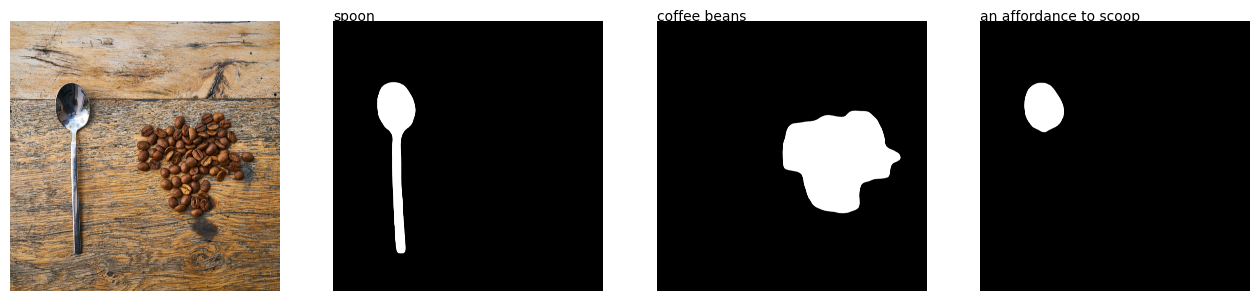

In [4]:
# Example 1
img = Image.open("images/spoon_and_coffee_beans.jpg").convert("RGB")
phrases = [
    "spoon", 
    "coffee beans", 
    "an affordance to scoop",
]

img = np.array(img)
height, width = img.shape[:2]
x = preprocess(img).unsqueeze(0)
x = x.repeat(len(phrases), 1, 1, 1)

with torch.inference_mode():
    if torch.cuda.is_available():
        x = x.cuda()

    with torch.autocast(device_type=device, enabled=enable_amp, dtype=torch.float16):
        outputs = model(x, phrases)

    # Only take S_fuse
    S_fuse = torch.sigmoid(outputs[-1])
    S_fuse = nn.functional.interpolate(S_fuse, size=(height, width), mode="bilinear")

    S_fuse = S_fuse.squeeze(1).cpu().numpy()
    S_fuse = 255 * np.uint8(S_fuse > threshold)

visualize_preds(img, S_fuse, phrases)

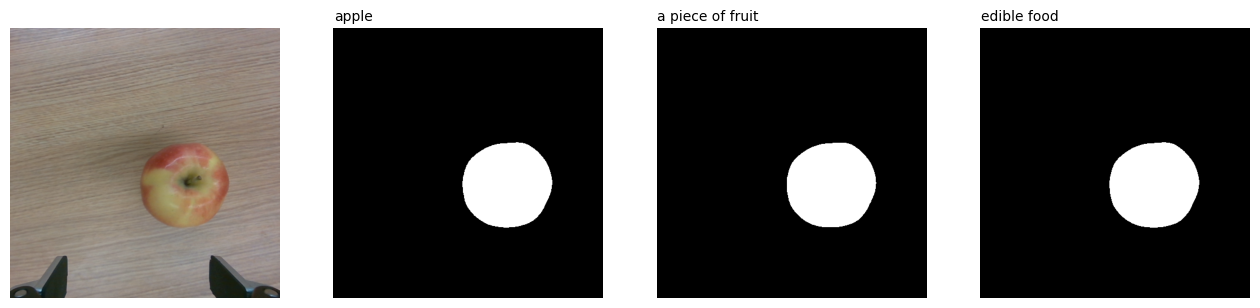

In [5]:
# Example 2
img = Image.open("images/apple_gen3.png").convert("RGB")
phrases = [
    "apple", 
    "a piece of fruit", 
    "edible food",
]

img = np.array(img)
height, width = img.shape[:2]
x = preprocess(img).unsqueeze(0)
x = x.repeat(len(phrases), 1, 1, 1)

with torch.inference_mode():
    if torch.cuda.is_available():
        x = x.cuda()

    with torch.autocast(device_type=device, enabled=enable_amp, dtype=torch.float16):
        outputs = model(x, phrases)

    # Only take S_fuse
    S_fuse = torch.sigmoid(outputs[-1])
    S_fuse = nn.functional.interpolate(S_fuse, size=(height, width), mode="bilinear")

    S_fuse = S_fuse.squeeze(1).cpu().numpy()
    S_fuse = 255 * np.uint8(S_fuse > threshold)

visualize_preds(img, S_fuse, phrases)

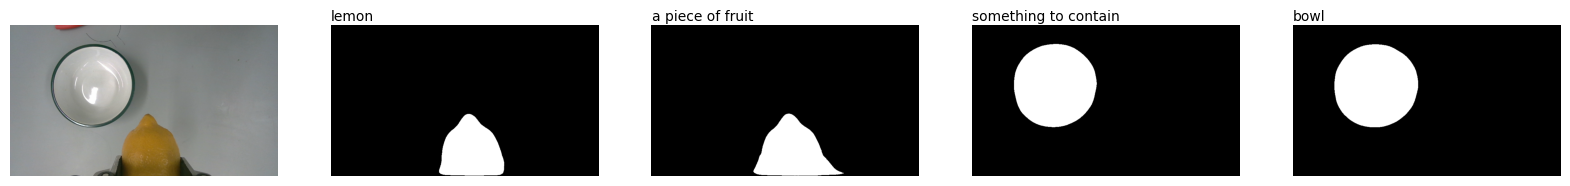

In [6]:
# Example 3: More new data from real-world robot control
img = Image.open("images/lemon_to_bowl.png").convert("RGB")
phrases = [
    "lemon", 
    "a piece of fruit", 
    "something to contain",
    "bowl",
]

img = np.array(img)
height, width = img.shape[:2]
x = preprocess(img).unsqueeze(0)
x = x.repeat(len(phrases), 1, 1, 1)

with torch.inference_mode():
    if torch.cuda.is_available():
        x = x.cuda()

    with torch.autocast(device_type=device, enabled=enable_amp, dtype=torch.float16):
        outputs = model(x, phrases)

    # Only take S_fuse
    S_fuse = torch.sigmoid(outputs[-1])
    S_fuse = nn.functional.interpolate(S_fuse, size=(height, width), mode="bilinear")

    S_fuse = S_fuse.squeeze(1).cpu().numpy()
    S_fuse = 255 * np.uint8(S_fuse > threshold)

visualize_preds(img, S_fuse, phrases)

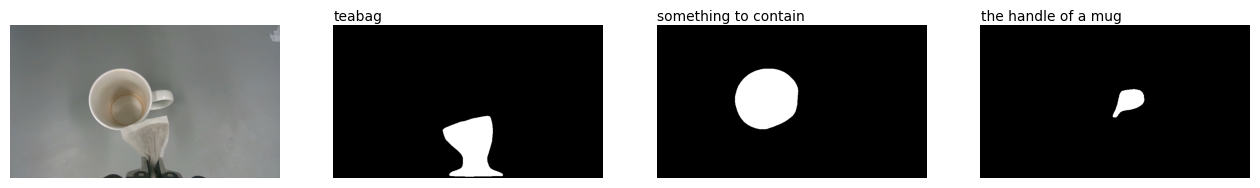

In [7]:
# Example 4: More new data from real-world robot control
img = Image.open("images/tea_bag_to_mug.png").convert("RGB")
phrases = [
    "teabag", 
    "something to contain",
    "the handle of a mug",
]

img = np.array(img)
height, width = img.shape[:2]
x = preprocess(img).unsqueeze(0)
x = x.repeat(len(phrases), 1, 1, 1)

with torch.inference_mode():
    if torch.cuda.is_available():
        x = x.cuda()

    with torch.autocast(device_type=device, enabled=enable_amp, dtype=torch.float16):
        outputs = model(x, phrases)

    # Only take S_fuse
    S_fuse = torch.sigmoid(outputs[-1])
    S_fuse = nn.functional.interpolate(S_fuse, size=(height, width), mode="bilinear")

    S_fuse = S_fuse.squeeze(1).cpu().numpy()
    S_fuse = 255 * np.uint8(S_fuse > threshold)

visualize_preds(img, S_fuse, phrases)